In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(Path('Resources/application_train.csv'))

In [3]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150494,274461,0,Revolving loans,F,N,N,0,90000.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
150495,274462,0,Cash loans,F,N,Y,1,148500.0,427500.0,33772.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,9.0
150496,274463,0,Cash loans,F,N,Y,0,202500.0,986782.5,53662.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
150497,274464,0,Cash loans,M,Y,Y,0,157500.0,639387.0,34686.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Remove all columns that have Null values
clean_df = df.dropna(axis=1)

In [5]:
clean_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150494,274461,0,Revolving loans,F,N,N,0,90000.0,135000.0,Working,...,0,0,0,0,0,0,0,0,0,0
150495,274462,0,Cash loans,F,N,Y,1,148500.0,427500.0,Working,...,0,0,0,0,0,0,0,0,0,0
150496,274463,0,Cash loans,F,N,Y,0,202500.0,986782.5,Commercial associate,...,0,0,0,0,0,0,0,0,0,0
150497,274464,0,Cash loans,M,Y,Y,0,157500.0,639387.0,Working,...,0,0,0,0,0,0,0,0,0,0


In [6]:
clean_df.shape

(150499, 55)

In [7]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150499 entries, 0 to 150498
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   150499 non-null  int64  
 1   TARGET                       150499 non-null  int64  
 2   NAME_CONTRACT_TYPE           150499 non-null  object 
 3   CODE_GENDER                  150499 non-null  object 
 4   FLAG_OWN_CAR                 150499 non-null  object 
 5   FLAG_OWN_REALTY              150499 non-null  object 
 6   CNT_CHILDREN                 150499 non-null  int64  
 7   AMT_INCOME_TOTAL             150499 non-null  float64
 8   AMT_CREDIT                   150499 non-null  float64
 9   NAME_INCOME_TYPE             150499 non-null  object 
 10  NAME_EDUCATION_TYPE          150499 non-null  object 
 11  NAME_FAMILY_STATUS           150499 non-null  object 
 12  NAME_HOUSING_TYPE            150499 non-null  object 
 13 

In [8]:
# Drop some of the unimportant columns
clean_df.drop(['SK_ID_CURR','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',\
               'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',\
               'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',\
               'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'], axis=1, inplace=True)

In [9]:
# Display the Final Dataframe
# clean_df.drop(['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_PHONE','FLAG_WORK_PHONE','REGION_POPULATION_RELATIVE'], axis=1, inplace=True)

In [10]:
# clean_df['DAYS_REGISTRATION'].value_counts()

In [11]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150499 entries, 0 to 150498
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       150499 non-null  int64  
 1   NAME_CONTRACT_TYPE           150499 non-null  object 
 2   CODE_GENDER                  150499 non-null  object 
 3   FLAG_OWN_CAR                 150499 non-null  object 
 4   FLAG_OWN_REALTY              150499 non-null  object 
 5   CNT_CHILDREN                 150499 non-null  int64  
 6   AMT_INCOME_TOTAL             150499 non-null  float64
 7   AMT_CREDIT                   150499 non-null  float64
 8   NAME_INCOME_TYPE             150499 non-null  object 
 9   NAME_EDUCATION_TYPE          150499 non-null  object 
 10  NAME_FAMILY_STATUS           150499 non-null  object 
 11  NAME_HOUSING_TYPE            150499 non-null  object 
 12  REGION_POPULATION_RELATIVE   150499 non-null  float64
 13 

In [12]:
# Convert categorical data to numeric and separate target feature for training data
X=clean_df.drop('TARGET',axis=1)
X_dummies =pd.get_dummies(X)

y=clean_df['TARGET']
y_dummies=LabelEncoder().fit_transform(y)

In [13]:
X.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,...,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,...,1,MONDAY,11,0,0,0,0,0,0,School
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,...,2,MONDAY,9,0,0,0,0,0,0,Government
3,Cash loans,F,N,Y,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,...,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,Cash loans,M,N,Y,0,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,...,2,THURSDAY,11,0,0,0,0,1,1,Religion


In [14]:
# Undersample imbalanced dataset with NearMiss-1
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where
# define dataset
# summarize class distribution
counter = Counter(y_dummies)
print(counter)
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X, y = undersample.fit_resample(X_dummies, y_dummies)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 138207, 1: 12292})
Counter({0: 12292, 1: 12292})


In [15]:
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=1)

# Using Unscaled Data

In [16]:
# Train the Logistic Regression model on the unscaled data and print the model score
classifier= LogisticRegression().fit(X_train,y_train)

print('Logisitc Regression - Unscaled Data')
print("------------------------------------")
print(f'Training Data Score: {classifier.score(X_train, y_train)}')
print(f'Testing Data Score: {classifier.score(X_test, y_test)}')

Logisitc Regression - Unscaled Data
------------------------------------
Training Data Score: 0.5982210651914525
Testing Data Score: 0.6007159127888058


In [17]:
# Train a Random Forest Classifier model and print the model score
classifier=RandomForestClassifier(random_state=1,n_estimators=500).fit(X_train,y_train)

print('Random Forest Classifier - Unscaled Data')
print("------------------------------------")
print(f'Training Data Score: {classifier.score(X_train, y_train)}')
print(f'Testing Data Score: {classifier.score(X_test, y_test)}')

Random Forest Classifier - Unscaled Data
------------------------------------
Training Data Score: 1.0
Testing Data Score: 0.7538236251220306


# Using Scaled Data

In [18]:
# Scale the data
scaler=StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [19]:
# Train the Logistic Regression model on the scaled data and print the model score
classifier= LogisticRegression(max_iter=5000,solver='lbfgs').fit(X_train_scaled,y_train)

print('Logisitc Regression - Scaled Data')
print("------------------------------------")
print(f'Training Data Score: {classifier.score(X_train_scaled, y_train)}')
print(f'Testing Data Score: {classifier.score(X_test_scaled, y_test)}')

Logisitc Regression - Scaled Data
------------------------------------
Training Data Score: 0.7006725241349387
Testing Data Score: 0.7053368044256427


In [20]:
# Train a Random Forest Classifier model on the scaled data and print the model score
classifier=RandomForestClassifier(random_state=1,n_estimators=500).fit(X_train_scaled,y_train)

print('Random Forest Classifier - Scaled Data')
print("------------------------------------")
print(f'Training Data Score: {classifier.score(X_train_scaled, y_train)}')
print(f'Testing Data Score: {classifier.score(X_test_scaled, y_test)}')

Random Forest Classifier - Scaled Data
------------------------------------
Training Data Score: 1.0
Testing Data Score: 0.7544744549300358


# Apply Feature Selection to Model

In [21]:
feature_importances = classifier.feature_importances_

In [22]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(classifier)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500,
                                                 random_state=1))

In [23]:
from matplotlib import pyplot as plt

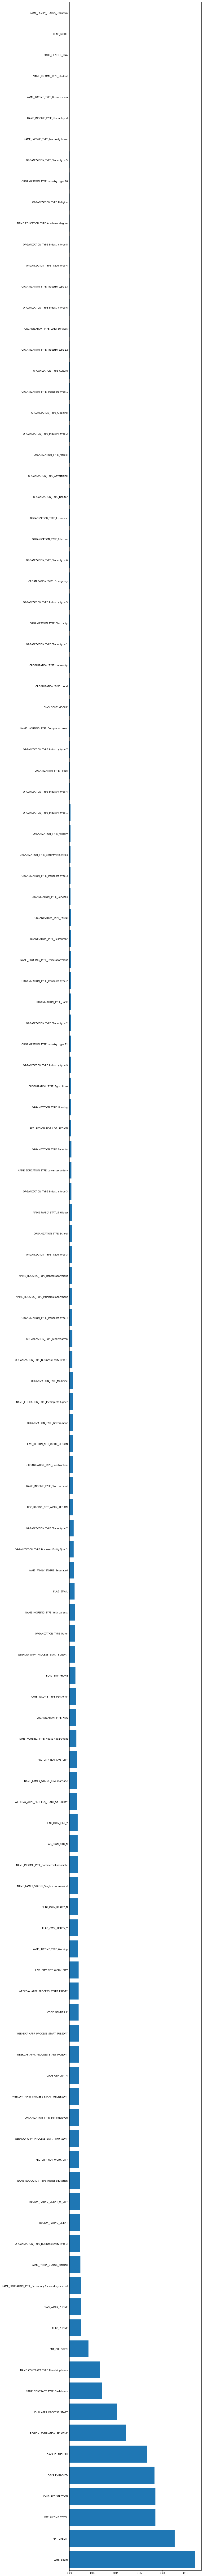

In [24]:
features = sorted(zip(X.columns, classifier.feature_importances_, sel.get_support()), key = lambda x: x[1], reverse=True)
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [25]:
# Display the Features that were selected
[i for i in features if i[2]] 

[('DAYS_BIRTH', 0.10818100509951221, True),
 ('AMT_CREDIT', 0.09039599597305195, True),
 ('AMT_INCOME_TOTAL', 0.07402991931475753, True),
 ('DAYS_REGISTRATION', 0.07402894087230288, True),
 ('DAYS_EMPLOYED', 0.07321062231773602, True),
 ('DAYS_ID_PUBLISH', 0.0668150915915715, True),
 ('REGION_POPULATION_RELATIVE', 0.04856411297831968, True),
 ('HOUR_APPR_PROCESS_START', 0.04096284963650042, True),
 ('NAME_CONTRACT_TYPE_Cash loans', 0.02788188960250025, True),
 ('NAME_CONTRACT_TYPE_Revolving loans', 0.026156493001855737, True),
 ('CNT_CHILDREN', 0.01645316611489732, True),
 ('FLAG_PHONE', 0.009820457637738512, True),
 ('FLAG_WORK_PHONE', 0.0096539291323807, True),
 ('NAME_EDUCATION_TYPE_Secondary / secondary special',
  0.009581213352281508,
  True),
 ('NAME_FAMILY_STATUS_Married', 0.009505916793113344, True),
 ('ORGANIZATION_TYPE_Business Entity Type 3', 0.009346134996256264, True),
 ('REGION_RATING_CLIENT', 0.00917082727996498, True),
 ('REGION_RATING_CLIENT_W_CITY', 0.009148866857570

In [26]:
# from sklearn.feature_selection import SelectFromModel
# sel = SelectFromModel(classifier)
# sel.fit(X_train_scaled, y_train)

In [27]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [28]:
clf = LogisticRegression().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.6951947065842282
Testing Score: 0.6965506020175724


In [29]:
clf=RandomForestClassifier(random_state=1,n_estimators=500).fit(X_selected_train_scaled,y_train)

print('Random Forest Classifier - Feature Selected Data')
print("------------------------------------")
print(f'Training Data Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Data Score: {clf.score(X_selected_test_scaled, y_test)}')

Random Forest Classifier - Feature Selected Data
------------------------------------
Training Data Score: 1.0
Testing Data Score: 0.7715587373901724


In [30]:
# Save the Model to Disk
import pickle
filename = 'Credit_Risk_Evaluator_Model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [31]:
# load the Model from Disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_selected_test_scaled, y_test)

In [32]:
# Print Model Score
print(result)

0.7715587373901724


In [33]:
# Convert the Dataframe to a CSV file for Analytics
final_df = pd.get_dummies(clean_df)
final_df.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,1,0,202500.0,406597.5,0.018801,-9461,-637,-3648,-2120,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,270000.0,1293502.5,0.003541,-16765,-1188,-1186,-291,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,67500.0,135000.0,0.010032,-19046,-225,-4260,-2531,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,135000.0,312682.5,0.008019,-19005,-3039,-9833,-2437,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,121500.0,513000.0,0.028663,-19932,-3038,-4311,-3458,1,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Write the CSV File
outputfile = 'final_result.csv'
final_df.to_csv(outputfile)

In [35]:
df_new = pd.read_csv(Path('final_result.csv'))

In [37]:
filename2 = 'scaler.sav'
pickle.dump(scaler, open(filename2, 'wb'))